# Typical Section Aeroelasticity

In [1]:
# Enable interactive plots in JupyterLab
%matplotlib widget

# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wgt
import numpy as np
import math

# This acts like a function allowing the creation of "struct-like" objects
class defineStruct:
    pass

# Import NACA0012 profile coordinates (suction side only)
airfoilData = pd.read_csv('NACA0012_suctionSide.csv').to_numpy(dtype = float)

## Set up the typical section graph
At this point simply introduce the parts that stay unchanged

In [2]:
# Generate the plot
plt.ioff()
fig, ax = plt.subplots(figsize=(8, 4));
ax.axis("equal"); ax.axis("off");

# Plot skins
ax.plot(airfoilData[:, 0], airfoilData[:, 1], color = 'black'); # suction side skin
ax.plot(airfoilData[:, 0], -airfoilData[:, 1], color = 'black'); # pressure side skin

# Plot auxiliary lines
# plt.plot(np.array([0, 0]), 0.3*np.array([1, -1]), color = 'black', linewidth = 0.5) # leading edge line
# plt.plot(np.array([1, 1]), 0.3*np.array([1, -1]), color = 'black', linewidth = 0.5) # trailing edge line
ax.plot(np.array([0.5, 0.5]), 0.3*np.array([1, -1]), color = 'black', linewidth = 0.5, linestyle = '--'); # mid-chord line

# Plot aerodynamic centre
ax.plot(0.25*np.array([1, 1]), 0.10*np.array([0, 1]), color = 'black', linewidth = 0.5);
p_ac = ax.scatter(0.25, 0, s = 40, c = 'black', marker = 'x');
ax.plot(np.array([0.25, 0.5]), 0.09*np.array([1, 1]), color = 'black', linewidth = 0.5);
ax.text(3*0.25/2, 0.11, str(f"{-2*0.25:.2f}"), ha = 'center', va = 'center');

And now define some initial values for the slider variables, to introduce these elements too. Start by plotting the flap front.

In [3]:
# Set initial values, to get default graph
a = -0.2; cg_a = 0.15; c =  0.4; cg_f = 0.55;

def getFlapData(c):

    # Distance between hinge line and points on the skin
    hingeDist = airfoilData - np.array([c/2 + 0.5, 0]) # distance vectors
    hingeDist = np.linalg.norm(hingeDist, axis = 1) # distance magnitude
    
    ind_minDist = np.argmin(hingeDist) # index of nearest skin point
    minDist = hingeDist[ind_minDist] # distance to nearest skin point
    minPoint = airfoilData[ind_minDist, :] # nearest point coordinates
    
    # Get circle segment representing the front end of the flap
    segAng = np.pi - math.atan2(minPoint[1], minPoint[0] - (c/2 + 0.5)) # angle between negative x-axis and nearest skin point
    arr_segAng = np.linspace(0, segAng, 20).reshape(20, 1)
    
    x_frontFlap = -minDist*np.cos(arr_segAng) + (c/2 + 0.5)
    y_frontFlap = minDist*np.sin(arr_segAng)
    
    frontFlapData = np.hstack((np.vstack((x_frontFlap[::-1], x_frontFlap[1:])),
                               np.vstack((-y_frontFlap[::-1], y_frontFlap[1:]))))

    return frontFlapData

# Plot flap
frontFlapData = getFlapData(c)
line_flap, = ax.plot(frontFlapData[:, 0], frontFlapData[:, 1], color = 'black');

Now also plot the variable dimensions of the typical section.

In [4]:
# Elastic axis
vLine_a, = ax.plot((a/2 + 0.5)*np.array([1, 1]), 0.18*np.array([0, 1]), color = 'blue', linewidth = 0.5);
p_a = ax.scatter(a/2 + 0.5, 0, s = 40, c = 'blue', marker = 'o', edgecolor = 'black');
hLine_a, = ax.plot(np.array([a/2 + 0.5, 0.5]), 0.17*np.array([1, 1]), color = 'blue', linewidth = 0.5);
txt_a = ax.text(0.5 + a/4, 0.19, str(f"{a:.2f}"), ha = 'center', va = 'center', color = 'blue');

# Centre of gravity - airfoil
vLine_CGa, = ax.plot((cg_a/2 + 0.5)*np.array([1, 1]), 0.26*np.array([0, 1]), color = 'blue', linewidth = 0.5);
p_CGa = ax.scatter(cg_a/2 + 0.5, 0, s = 40, c = 'blue', marker = 'D', edgecolor = 'black');
hLine_CGa, = ax.plot(np.array([cg_a/2 + 0.5, 0.5]), 0.25*np.array([1, 1]), color = 'blue', linewidth = 0.5);
txt_CGa = ax.text(0.5 + cg_a/4, 0.27, str(f"{cg_a:.2f}"), ha = 'center', va = 'center', color = 'blue');

# Flap hinge axis
vLine_c, = ax.plot((c/2 + 0.5)*np.array([1, 1]), -0.18*np.array([0, 1]), color = 'red', linewidth = 0.5);
p_c = ax.scatter(c/2 + 0.5, 0, s = 40, c = 'red', marker = 'o', edgecolor = 'black');
hLine_c, = ax.plot(np.array([c/2 + 0.5, 0.5]), -0.17*np.array([1, 1]), color = 'red', linewidth = 0.5);
txt_c = ax.text(0.5 + c/4, -0.19, str(f"{c:.2f}"), ha = 'center', va = 'center', color = 'red');

# Centre of gravity - flap
vLine_CGf, = ax.plot((cg_f/2 + 0.5)*np.array([1, 1]), -0.26*np.array([0, 1]), color = 'red', linewidth = 0.5);
p_CGf = ax.scatter(cg_f/2 + 0.5, 0, s = 40, c = 'red', marker = 'D', edgecolor = 'black');
hLine_CGf, = ax.plot(np.array([cg_f/2 + 0.5, 0.5]), -0.25*np.array([1, 1]), color = 'red', linewidth = 0.5);
txt_CGf = ax.text(0.5 + cg_f/4, -0.27, str(f"{cg_f:.2f}"), ha = 'center', va = 'center', color = 'red');

ax.legend([p_ac, p_a, p_CGa, p_c, p_CGf], ["Aero. Centre", "Elastic Axis", "C.G. Airfoil", "Flap Hinge Axis", "C.G. Flap"],
           loc='center left', bbox_to_anchor=(1, 0.5));

## Use sliders to customise the typical section
Start by defining the function that updates the elements of the plot.

In [5]:
def updatePoints(x, vLine, p, hLine, txt):

    # Start with vertical line
    vLine.set_xdata((x/2 + 0.5)*np.array([1, 1]))
    vLine.figure.canvas.draw_idle()

    # Update scatter point
    p.set_offsets(np.c_[x/2 + 0.5, 0])
    p.figure.canvas.draw_idle()

    # Update horizontal line
    hLine.set_xdata([x/2 + 0.5, 0.5])
    hLine.figure.canvas.draw_idle()

    # Finally update the text string as well as position
    txt.set_x(0.5 + x/4)
    txt.set_text(str(f"{x:.2f}"))
    txt.figure.canvas.draw_idle()
    

In [6]:
def updateTypSection(a, cg_a, c, cg_f):

    # Front flap line
    frontFlapData = getFlapData(c)
    line_flap.set_xdata(frontFlapData[:, 0])
    line_flap.set_ydata(frontFlapData[:, 1])
    line_flap.figure.canvas.draw_idle()

    # The four variable points
    updatePoints(a, vLine_a, p_a, hLine_a, txt_a) # elastic axis
    updatePoints(cg_a, vLine_CGa, p_CGa, hLine_CGa, txt_CGa) # C.G. airfoil
    updatePoints(c, vLine_c, p_c, hLine_c, txt_c) # hinged flap axis
    updatePoints(cg_f, vLine_CGf, p_CGf, hLine_CGf, txt_CGf) # C.G. flap
    

Define sliders and plot interactive graph

interactive(children=(FloatSlider(value=-0.2, description='Elastic Axis', max=0.9, min=-0.9, step=0.01), Float…

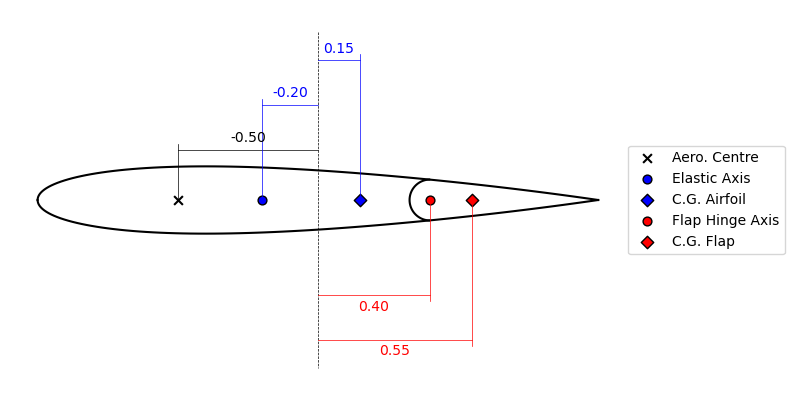

In [7]:
wgt.interact(updateTypSection,
    a = wgt.FloatSlider(value = -0.2, min = -0.9, max = 0.9, step = 0.01, description = 'Elastic Axis'),
    cg_a = wgt.FloatSlider(value = 0.15, min = -0.9, max = 0.9, step = 0.01, description = 'C.G. Airfoil'),
    c = wgt.FloatSlider(value = 0.4, min = -0.9, max = 0.9, step = 0.01, description = 'Flap Hinge Axis'),
    cg_f = wgt.FloatSlider(value = 0.55, min = -0.9, max = 0.9, step = 0.01, description = 'C.G. Flap'))

# Keep the plt.show() on a separate cell
fig.tight_layout();
plt.show()